In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as pth
import seaborn as sns
from astropy.stats import RipleysKEstimator
import sklearn.neighbors as sn
from shapely.geometry import Polygon
import re
from itertools import compress
from decimal import Decimal
pd.options.display.max_colwidth=300
pd.options.display.max_columns=30

In [2]:
z = np.random.uniform(low=5, high=10, size=(100, 2))
Kest = RipleysKEstimator(area=25, x_max=10, y_max=10, x_min=5, y_min=5)

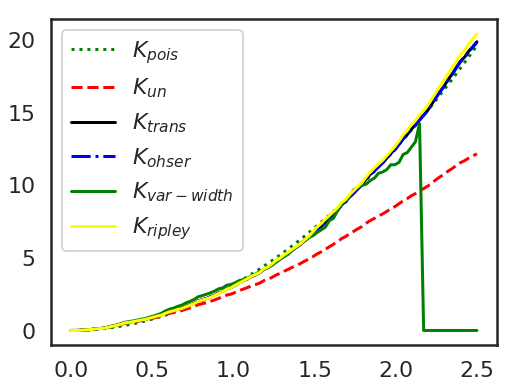

In [3]:
sns.set(context='poster', style='white')
plt.figure(figsize=(8,6))
r = np.linspace(0, 2.5, 100)
plt.plot(r, Kest.poisson(r), color='green', ls=':', label=r'$K_{pois}$')
plt.plot(r, Kest(data=z, radii=r, mode='none'), color='red', ls='--',
         label=r'$K_{un}$')
plt.plot(r, Kest(data=z, radii=r, mode='translation'), color='black',
         label=r'$K_{trans}$')
plt.plot(r, Kest(data=z, radii=r, mode='ohser'), color='blue', ls='-.',
         label=r'$K_{ohser}$')
plt.plot(r, Kest(data=z, radii=r, mode='var-width'), color='green',
         label=r'$K_{var-width}$')
plt.plot(r, Kest(data=z, radii=r, mode='ripley'), color='yellow',
         label=r'$K_{ripley}$')
plt.legend()

### RipleysKEstimator arguments:
* data - 2D array - represents the set of observed points in the area of the study
* radii - set of distances for which the estimator evaluates
* mode - method of edge correction (none, translation, ohser, var-width, ripley)

In [4]:
samples = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]
neigh=sn.NearestNeighbors(2,1)
neigh.fit(samples)
neigh.kneighbors([[0, 0, 1.3]], 2, return_distance=False)

array([[2, 0]])

In [5]:
nbrs=neigh.radius_neighbors(X= [[0,0,1.3]], radius=0.4, return_distance=False)
np.asarray(nbrs[0][0])

array(2)

In [6]:
from glob import glob
import re
import os.path
from collections import defaultdict
base='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/'
group_ids = {'High': ['BB185', 'BB193'], 'Ctrl': ['BB192', 'BB203'], 'Low': ['BB222', 'BB226', 'BB238', 'BB239']}
groups=defaultdict(list)

for file in glob(base + '*ROI.txt'):
    for g in group_ids:
        for i in group_ids[g]:
            if re.match('{}_.*txt'.format(i), os.path.basename(file)):
                groups[g].append(file)
                break

In [7]:
groups

defaultdict(list, {})

In [8]:
from shapely.geometry import Polygon
df=pd.read_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt',
              sep='\t')
df.head()

x             y
0  21957.133450  17381.247313
1  21956.622060  17385.639156
2  21874.062505  17467.798386
3  21792.544693  17551.258496
4  21709.817157  17633.578128

In [9]:
coords=list(zip(df['x'], df['y']))
poly=Polygon(coords)
poly.area

1383649.9401110257

In [10]:
from glob import glob
import re
import os.path
from collections import defaultdict
base='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/'
group_ids = {'High': ['BB185', 'BB193'], 'Ctrl': ['BB192', 'BB203'], 'Low': ['BB222', 'BB226', 'BB238', 'BB239']}
groups_coord=defaultdict(list)

for file in glob(base + '*COORD.txt'):
    for g in group_ids:
        for i in group_ids[g]:
            if re.match('{}_.*txt'.format(i), os.path.basename(file)):
                groups_coord[g].append(file)
                break
groups_coord

defaultdict(list,
            {'High': ['/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt',
              '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_13_RoiAttr_COORD.txt',
              '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_16_RoiAttr_COORD.txt',
              '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03_activeContourROI_19_RoiAttr_COORD.txt',
              '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list

In [11]:
print(len(groups['High']))
print(len(groups['Low']))
print(len(groups['Ctrl']))

print(len(groups_coord['High']))
print(len(groups_coord['Low']))
print(len(groups_coord['Ctrl']))

0
0
0
78
204
83


In [12]:
roiattr_files= !ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/*COORD.txt
files=pd.DataFrame(data=roiattr_files, columns=['RoiAttr'])
files['index']=files['RoiAttr'].map(lambda x: x[82:90]+ str('_') + x[121:123]  + '_'
                                    + re.search(r'\w*_(\d+)_RoiAttr_COORD.txt', x).group(1))
# files['roi_no']=files['RoiAttr'].map(lambda x: re.search(r'\w*_(\d+)_RoiAttr_COORD.txt', x).group(1))
files.set_index('index', inplace=True)
files.head(3)

RoiAttr
index                                                                                                                                                                                                         
BB185_02_01_4    /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt
BB185_02_02_13  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_13_RoiAttr_COORD.txt
BB185_02_02_16  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_16_RoiAttr_COORD.txt

In [13]:
roicoord_files=! ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/*.txt
files_coord=pd.DataFrame(data=roicoord_files, columns=['RoiCoord'])
files_coord['index']=files_coord['RoiCoord'].map(lambda x: x[83:91]+ str('_') + x[122:124] + '_' + 
                                                re.search(r'\w*_(\d+)_RoiCoord.txt', x).group(1))
files_coord.set_index('index', inplace=True)
files_coord.head(3)

RoiCoord
index                                                                                                                                                                                      
BB185_02_01_4    /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_4_RoiCoord.txt
BB185_02_02_13  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_13_RoiCoord.txt
BB185_02_02_16  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_16_RoiCoord.txt

In [14]:
def group_id(Cell):
    if Cell=='BB185':
        return 'High'
    if Cell=='BB193':
        return 'High'
    if Cell=='BB192':
        return 'Ctrl'
    if Cell=='BB203':
        return 'Ctrl'
    if Cell == 'BB222':
        return 'Low'
    if Cell == 'BB226':
        return 'Low'
    if Cell == 'BB238':
        return 'Low'
    if Cell == 'BB239':
        return 'Low'

In [15]:
files['RoiCoord']=files.index.map(files_coord['RoiCoord'])
files['Cell']=files.index.map(lambda x: x[:5])
files['Group']=files['Cell'].apply(lambda cell: group_id(cell))
files=files.dropna()
files.head()

RoiAttr  \
index                                                                                                                                                                                                            
BB185_02_01_4    /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt   
BB185_02_02_13  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_13_RoiAttr_COORD.txt   
BB185_02_02_16  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_16_RoiAttr_COORD.txt   
BB185_02_03_19  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03_activeContourROI_19_RoiAttr_COORD.txt   
BB185_02_03_24  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03_activeContourROI_24_RoiAttr_COORD.txt   

                                                                                                                                                                                   RoiCoord  \
index                                                                                                                                                                                         
BB185_02_01_4    /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_4_RoiCoord.txt   
BB185_02_02_13  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_13_RoiCoord.txt   
BB185_02_02_16  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_16_RoiCoord.txt   
BB185_02_03_19  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03CB_19_RoiCoord.txt   
BB185_02_03_24  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03CB_24_RoiCoord.txt   

                 Cell Group  
index                        
BB185_02_01_4   BB185  High  
BB185_02_02_13  BB185  High  
BB185_02_02_16  BB185  High  
BB185_02_03_19  BB185  High  
BB185_02_03_24  BB185  High

In [16]:
files.iloc[0,1]

'/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_4_RoiCoord.txt'

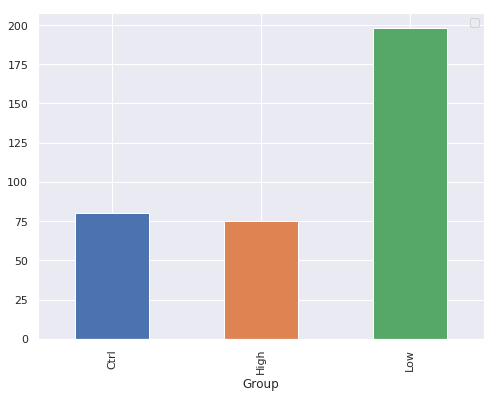

In [17]:
sns.set()
files.dropna().groupby(by='Group').count().plot(y='Cell', kind='bar', figsize=(8,6))
plt.legend('')

In [18]:
def polygon_area(path):
    '''
Reads a coordinate file and returns a  polygon.
Needs  shapely
'''
    df=pd.read_csv(path, sep='\t', header='infer')
    roizip=zip(df.x, df.y)
    roilist=list(roizip)
    polyarea=Polygon(roilist).area
    return polyarea
    

In [19]:
pr=polygon_area('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03_activeContourROI_19_RoiAttr_COORD.txt')
pr

1516115.8538633583

In [20]:
coord01=pd.read_csv(files.iloc[0,1],
                   header='infer', sep='\t')
# coord01.head(2)
n=len(coord01.loc[coord01['Channel Name']=='405/647'])
n

924

In [46]:
print(f'Number of real points: {n} \nNumber of generated points: {ins}') # prints real and generated LP number inside the polygon

Number of real points: 924 
Number of generated points: 924


In [21]:
xx=coord01.loc[coord01['Channel Name']=='405/647']['X']
yy=coord01.loc[coord01['Channel Name']=='405/647']['Y']
real=list(zip(xx, yy))
real[:10]

[(22325.7, 18100.4),
 (22343.9, 18193.2),
 (21514.8, 18409.4),
 (21294.2, 18350.2),
 (22096.4, 18069.8),
 (22324.7, 17624.6),
 (21621.7, 18118.8),
 (21873.2, 17889.8),
 (22059.1, 17740.1),
 (21555.4, 18562.8)]

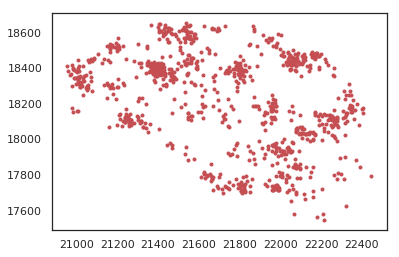

In [22]:
sns.set(style='white')
plt.plot(xx,yy, "ro", markersize=3)

In [23]:
files.iloc[0,0]

'/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt'

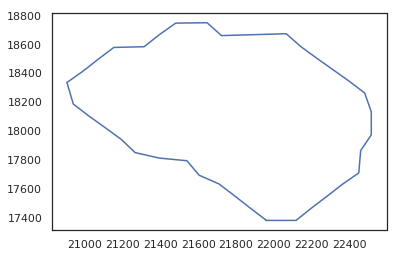

In [24]:
attr01=pd.read_csv(files.iloc[0,0],
                   header='infer', sep='\t')
# attr01.head()
vtx=list(zip(attr01['x'], attr01['y']))
plt.plot(attr01['x'], attr01['y'])

xlow=attr01.x.min()
xhigh=attr01.x.max()
ylow=attr01.y.min()
yhigh=attr01.y.max()

924


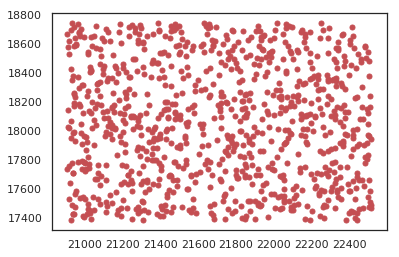

In [25]:
zx=np.random.uniform(low=xlow, high=xhigh, size=n)
zy=np.random.uniform(low=ylow, high=yhigh, size=n)
zxy=list(zip(zx,zy))
print(len(zxy))
plt.plot(zx, zy, 'ro', markersize=5)

In [26]:
contain=pth.Path(vtx).contains_points(zxy)
filtered=list(compress(zxy, contain))
ins=len(filtered)
ins

578

In [27]:
while ins<n:
    zx1=np.random.uniform(low=xlow, high=xhigh, size=(n-ins))
    zy1=np.random.uniform(low=ylow, high=yhigh, size=(n-ins))
    zxy1=list(zip(zx1,zy1))
    zxy=zxy+zxy1
#     print(zxy)/
    contain=pth.Path(vtx).contains_points(zxy)
    filtered=list(compress(zxy, contain))
    ins=len(filtered)

In [28]:
print(n, ins, sep="\n")

924
924


In [29]:
fx,fy=zip(*filtered)
len(fy)

924

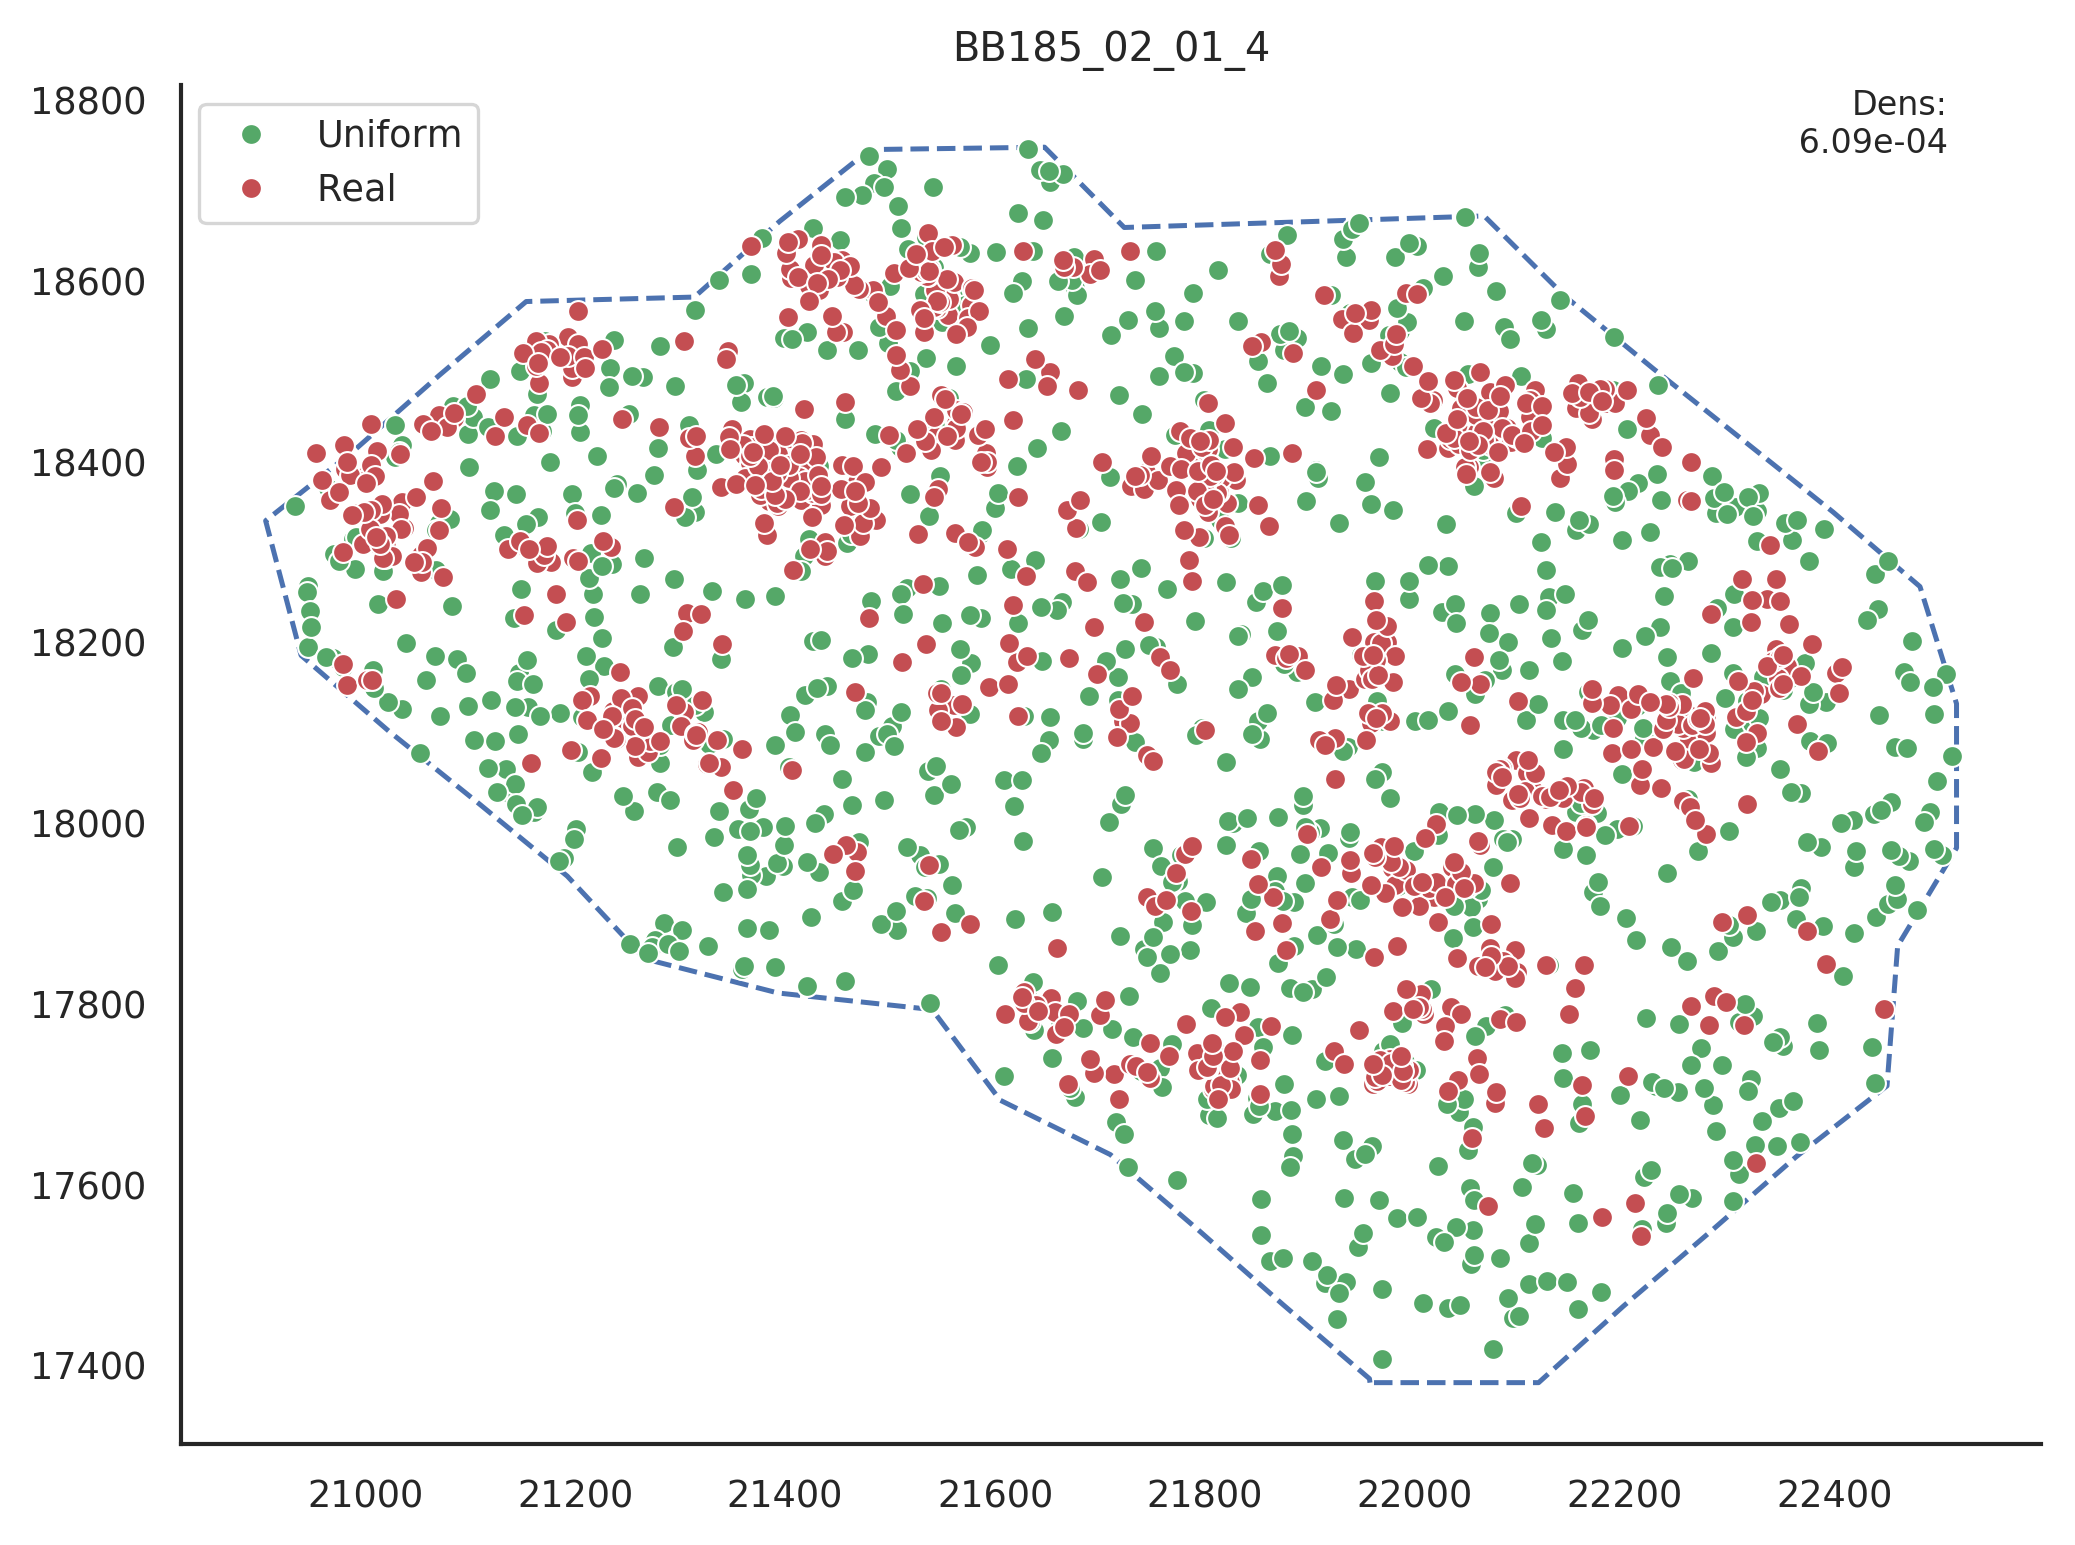

In [137]:
sns.set(style="white", context="paper")
f=plt.figure(figsize=(8,6), dpi=300)
ax=f.add_subplot(111)
plt.plot(attr01['x'], attr01['y'], 'b--', label='_nolegend_')
plt.plot(fx,fy, 'go', markersize=5, markeredgecolor="w", markeredgewidth=0.5, label='Uniform')
plt.plot(xx,yy, 'ro', markersize=5, markeredgecolor="w", markeredgewidth=0.5, label='Real')
plt.legend(loc=2)
plt.text(0.95,0.95, f'Dens:\n {dens:.<3.2e}', transform=ax.transAxes, fontsize=8, ha='right')
plt.title('BB185_02_01_4')
sns.despine()

In [62]:
dens=n/pr
print(f'(dens))

SyntaxError: EOL while scanning string literal (<ipython-input-62-43d738604fe4>, line 2)

In [31]:
sns.set(style="whitegrid", context="poster")
plt.figure(figsize=(10,10))
r=np.linspace(0,300,100)
Kest=RipleysKEstimator(area=pr, x_min=xlow, x_max=xhigh, y_min=ylow, y_max=yhigh)
plt.plot(r, Kest.poisson(r), color='blue', ls='--', label=r'$K_{pois}$')
plt.plot(r, Kest(data=filtered, radii=r, mode='ripley'), color='red', ls='--', label=r'$K_{uniform}$')
plt.plot(r, Kest(data=real, radii=r, mode='ripley'), color='cyan', ls='--', label=r'$K_{GABA\ bouton}$')
# plt.plot(r, Kest(data=real, radii=r, mode='none'), color='yellow', ls='--',
#          label=r'$K_{un}$')
# plt.plot(r, Kest(data=real, radii=r, mode='translation'), color='black',
#          label=r'$K_{trans}$')
# plt.plot(r, Kest(data=real, radii=r, mode='ohser'), color='blue', ls='-.',
#          label=r'$K_{ohser}$')
# plt.plot(r, Kest(data=real, radii=r, mode='var-width'), color='green',
#          label=r'$K_{var-width}$')
plt.legend()